In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML

def plot_movie_mp4(image_array):
    dpi = 72.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [2]:
import os
import sys


#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
#Importing the VAE
from VAE.world_model_vae import VAE

/home/kaiolae/code/word_models_keras_test/WorldModels


Using TensorFlow backend.


In [2]:
import os
import sys


#Adding old Keras WorldModels path to pythonpath
old_keras_path = os.path.split(os.getcwd())[0]+"/../WorldModels_Keras_Foster"
print(old_keras_path)
if old_keras_path not in sys.path:
    sys.path.append(old_keras_path)
    
#Importing the VAE
from vae.arch import VAE

/home/kaiolae/code/word_models_keras_test/WorldModels/../WorldModels_Keras_Foster


Using TensorFlow backend.


In [4]:
#Loading Weights of trained VAE
vae = VAE()
#vae.set_weights("../../WorldModels_Keras_Foster/vae/weights.h5")
vae.set_weights("../vae/weights.h5")

VAE init
Compiling
VAE init done


In [5]:
#Getting some data to feed into the VAE
import numpy as np
data = np.load("../data/obs_data_doomrnn_1.npy")



In [6]:
#Data: Dimensions are (rollout, timestep, x-axis, y-axis, colors)
print(data.shape)

selected_rollout = data[2]
#print(selected_rollout.shape)

some_picture = selected_rollout[200]
some_picture.shape

(100,)


(64, 64, 3)

In [7]:
#Testing reconstructing the data with the VAE
latent_values_for_rollout = vae.generate_latent_variables(np.array(selected_rollout))
latent_values_for_rollout.shape
#Cool! We can prove that we're actually compressing things here simply by looking at the shape of the latent variables.

(300, 64)

(300, 64, 64, 3)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


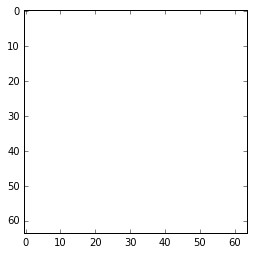

In [8]:
regenerated_images = vae.generate_picture_from_latent(latent_values_for_rollout)
print(regenerated_images.shape)
plt.imshow(regenerated_images[0])
print(regenerated_images[0])

In [9]:
#Showing original and regenerated images as videos
#TODO Those regenerated images don't contain turns! Am I plotting the
#wrong images, or did it not learn that??
#Oh, rollout 55 shows the VAE indeed learned to separate out that 
#black area. That also proves I'm actually plotting the right stuff.
#But why not the turns..? Need more training? In fact, the VAE has learned
#that the car is ALWAYS in the middle of the road :(
plot_movie_mp4(selected_rollout)
plot_movie_mp4(regenerated_images)